In [1]:
import pandas as pd
# import packages
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error as mse
%matplotlib inline
from sklearn.preprocessing import OneHotEncoder
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold 
from sklearn.model_selection import cross_val_score
from sklearn import linear_model, metrics
from sklearn.metrics import mean_squared_error, r2_score
df = pd.read_csv('../../../data/kc_house_data.csv')

In [2]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0.0,0.0,...,8,1530,0.0,2009,0.0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0.0,0.0,...,8,2310,0.0,2014,0.0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0.0,0.0,...,7,1020,0.0,2009,0.0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,NaN,0.0,...,8,1600,0.0,2004,0.0,98027,47.5345,-122.069,1410,1287


In [3]:
df = df.replace('?', np.nan)

In [4]:
df.sqft_basement = df.sqft_basement.replace('?', np.nan)

In [5]:
df.sqft_basement = df.sqft_basement.astype(float)

In [6]:
df = df.replace(np.nan, '0')

In [7]:
X = df[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'yr_renovated', 'view', 'condition', 'grade', 'sqft_basement']]
y = df['price']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [9]:
lr = LinearRegression()

In [10]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [11]:
lr.fit(X_train, y_train)

LinearRegression()

In [12]:
X_train

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,bathrooms,bedrooms,lat,long,zipcode,grade,yr_built,yr_renovated,view,condition,grade,sqft_basement
6405,1880,4499,2130,5114,1880,2.50,3,47.5664,-121.999,98029,8,1993,0,0,3,8,0
937,2020,6564,1710,5151,1310,2.50,3,47.3545,-122.158,98042,7,1994,0,0,3,7,710
19076,4720,493534,2160,219542,3960,4.00,5,47.4536,-122.009,98027,9,1975,0,0,5,9,760
15201,1430,3880,1430,3880,1430,2.00,2,47.6844,-122.392,98117,7,1949,0,0,4,7,0
13083,2270,32112,2310,41606,1740,2.25,3,47.3451,-122.094,98042,8,1980,0,0,4,8,530
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2230,5800,2230,6088,2230,2.50,3,47.5308,-121.847,98065,7,2004,0,0,3,7,0
21575,2770,3852,1810,5641,2770,2.75,4,47.5001,-122.232,98178,8,2014,0,0,3,8,0
5390,1530,9000,1520,8500,1530,1.50,4,47.6492,-121.908,98014,6,1976,0,0,4,6,0
860,380,15000,1170,15000,380,0.75,1,47.4810,-122.323,98168,5,1963,0,0,3,5,0


In [13]:
lr.score(X_test, y_test)

0.6749801766510155

In [14]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: 5847708.651645162
Slope: [ 8.37235990e+01  6.41764221e-02  2.36456866e+01 -4.23743578e-01
  9.44716764e+01  4.49044616e+04 -3.94017706e+04  5.83078694e+05
 -2.14040993e+05 -5.63097871e+02  4.96449707e+04 -2.64690829e+03
  2.71158200e+01  7.81108175e+04  2.96156529e+04  4.96449707e+04
  6.27659350e+01]


In [15]:
# Make predictions for train and test set
train_preds1 = lr.predict(X_train)
test_preds1 = lr.predict(X_test)

In [16]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 205095.98689943543
Testing RMSE: 211169.66086557135


In [17]:
X_train = X_train.loc[y_train.index]

In [18]:
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,5/21/2014,360000.0,3,2.50,1530,1131,3.0,0,0,...,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21593,6600060120,2/23/2015,400000.0,4,2.50,2310,5813,2.0,0,0,...,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21594,1523300141,6/23/2014,402101.0,2,0.75,1020,1350,2.0,0,0,...,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21595,291310100,1/16/2015,400000.0,3,2.50,1600,2388,2.0,0,0,...,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [19]:
X_train.sqft_basement = X_train.sqft_basement.replace('?', np.nan)

In [20]:
X_train.sqft_basement = X_train.sqft_basement.astype(float)

In [21]:
X_train['target'] = y_train

In [22]:
X_train.dtypes

sqft_living        int64
sqft_lot           int64
sqft_living15      int64
sqft_lot15         int64
sqft_above         int64
bathrooms        float64
bedrooms           int64
lat              float64
long             float64
zipcode            int64
grade              int64
yr_built           int64
yr_renovated      object
view              object
condition          int64
grade              int64
sqft_basement    float64
target           float64
dtype: object

In [23]:


X_train[(np.abs(stats.zscore(X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'target']])) < 3).all(axis=1)].drop_duplicates()

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,bathrooms,bedrooms,lat,long,zipcode,grade,yr_built,yr_renovated,view,condition,grade,sqft_basement,target
6405,1880,4499,2130,5114,1880,2.50,3,47.5664,-121.999,98029,8,1993,0,0,3,8,0.0,529000.0
937,2020,6564,1710,5151,1310,2.50,3,47.3545,-122.158,98042,7,1994,0,0,3,7,710.0,253000.0
15201,1430,3880,1430,3880,1430,2.00,2,47.6844,-122.392,98117,7,1949,0,0,4,7,0.0,545000.0
13083,2270,32112,2310,41606,1740,2.25,3,47.3451,-122.094,98042,8,1980,0,0,4,8,530.0,390000.0
16852,1048,4800,950,4800,1048,1.50,1,47.4759,-122.212,98055,7,1942,0,0,3,7,0.0,199950.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,2230,5800,2230,6088,2230,2.50,3,47.5308,-121.847,98065,7,2004,0,0,3,7,0.0,440000.0
21575,2770,3852,1810,5641,2770,2.75,4,47.5001,-122.232,98178,8,2014,0,0,3,8,0.0,572000.0
5390,1530,9000,1520,8500,1530,1.50,4,47.6492,-121.908,98014,6,1976,0,0,4,6,0.0,299800.0
860,380,15000,1170,15000,380,0.75,1,47.4810,-122.323,98168,5,1963,0,0,3,5,0.0,245000.0


In [24]:
df_2 = df.copy()

In [25]:
X = df_2[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms',  'lat', 'long', 'zipcode', 'grade', 'yr_built', 'condition', 'grade']]
y = df_2['price']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [27]:
X_train['target'] = y_train
X_train_no = X_train[(np.abs(stats.zscore(X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'target']])) < 3).all(axis=1)].drop_duplicates()
y_train_no = X_train_no['target']
X_train_no = X_train_no.drop('target', axis = 1)


<ipython-input-27-5e35db3e1a1c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['target'] = y_train


In [28]:
lr = LinearRegression()

In [29]:
lr.fit(X_train_no, y_train_no)

LinearRegression()

In [30]:
lr.score(X_test, y_test)

0.5974311169818393

In [31]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: -10841613.350749869
Slope: [ 9.60608408e+01  2.28153443e-01  5.97762211e+01 -1.34728661e+00
  6.09964581e+00  3.97595843e+04 -2.18642486e+04  5.43852284e+05
 -1.16337294e+05 -2.56699843e+02  4.64735343e+04 -2.37251020e+03
  2.59826344e+04  4.64735343e+04]


In [32]:
# Make predictions for train and test set
train_preds1 = lr.predict(X_train_no)
test_preds1 = lr.predict(X_test)

(array([  29.,   75.,  399., 1638., 3031., 3670., 3218., 2126.,  732.,
         339.]),
 array([11.26446411, 11.56903838, 11.87361264, 12.17818691, 12.48276118,
        12.78733545, 13.09190972, 13.39648399, 13.70105826, 14.00563253,
        14.3102068 ]),
 <BarContainer object of 10 artists>)

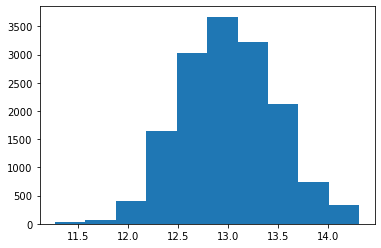

In [33]:
plt.hist(np.log(y_train_no))

In [34]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_no, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 142027.29420188637
Testing RMSE: 235015.60417597834


In [35]:
lr_scaled = LinearRegression()

In [36]:
y_train_scaled = np.log(y_train_no)

In [37]:
lr_scaled.fit(X_train_no, y_train_no)

LinearRegression()

In [38]:
# Make predictions for train and test set
train_preds2 = lr.predict(X_train_no)
test_preds2 = lr.predict(X_test)

In [39]:
print('Training RMSE: {}'.format(np.sqrt(mse(np.exp(y_train_scaled), train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds2))))

Training RMSE: 142027.2942018864
Testing RMSE: 235015.60417597834


In [40]:
from sklearn.preprocessing import StandardScaler

In [41]:
scaler = StandardScaler()

In [42]:
scaler.fit(X_train_no)

StandardScaler()

In [43]:
X_train_no_scaled = pd.DataFrame(scaler.transform(X_train_no), columns=X_train_no.columns)
X_test_no_scaled = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)

In [44]:
X_train_no_scaled

,sqft_living,sqft_lot,sqft_living15,sqft_lot15,sqft_above,bathrooms,bedrooms,lat,long,zipcode,grade,yr_built,condition,grade
0,-0.130715,-0.478706,0.335475,-0.458508,0.250348,0.643440,-0.380558,0.038492,1.587206,-0.939584,0.425537,0.771167,-0.635755,0.425537
1,0.053526,-0.302462,-0.353632,-0.454451,-0.556646,0.643440,-0.380558,-1.489545,0.440138,-0.697597,-0.529511,0.805274,-0.635755,-0.529511
2,-0.722920,-0.531537,-0.813036,-0.593808,-0.386753,-0.075015,-1.545754,0.889405,-1.248002,0.698479,-0.529511,-0.729533,0.900712,-0.529511
3,0.382529,1.878016,0.630807,3.542587,0.052139,0.284213,-0.380558,-1.557330,0.901851,-0.697597,0.425537,0.327778,0.900712,0.425537
4,-1.225637,-0.453016,-1.600587,-0.492936,-0.927580,-0.793469,-2.710951,-0.614115,0.050567,-0.455611,-0.529511,-0.968281,-0.635755,-0.529511
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15252,0.329889,-0.367668,0.499549,-0.351716,0.745870,0.643440,-0.380558,-0.218224,2.683775,-0.269467,-0.529511,1.146342,-0.635755,-0.529511
15253,1.040535,-0.533926,-0.189558,-0.400726,1.510390,1.002668,0.784638,-0.439606,-0.093718,1.833955,0.425537,1.487410,-0.635755,0.425537
15254,-0.591319,-0.094553,-0.665370,-0.087257,-0.245175,-0.793469,0.784638,0.635573,2.243705,-1.218799,-1.484558,0.191351,0.900712,-1.484558
15255,-2.104733,0.417536,-1.239626,0.625423,-1.873320,-1.871152,-2.710951,-0.577338,-0.750217,1.647811,-2.439606,-0.252038,-0.635755,-2.439606


In [45]:
df_3 = df.copy()

In [46]:
# Isolate the features for the first model



X = df_3.drop(['id', 'price', 'zipcode', 'date'], axis=1)
y = df_3['price']



In [47]:
X_train_no_scaled, X_test_no_scaled, y_train_no, y_test = train_test_split(X, y, test_size=.25, random_state=42)

In [48]:
lr = LinearRegression()

In [49]:
lr.fit(X_train_no_scaled, y_train_no)

LinearRegression()

In [50]:
lr.score(X_test_no_scaled, y_test)

0.6835918742762633

In [51]:
print('Intercept: {}'.format(lr.intercept_))
print('Slope: {}'.format(lr.coef_))

Intercept: -35497280.822653845
Slope: [-3.48760358e+04  4.28000822e+04  8.21171308e+01  8.83003579e-02
  5.93035499e+03  6.28897873e+05  4.83713774e+04  3.32337776e+04
  1.02037655e+05  8.72019392e+01  6.43143688e+01 -2.55859822e+03
  2.05484744e+01  5.42447515e+05 -1.14401887e+05  3.30802091e+01
 -4.35873980e-01]


In [52]:
# Make predictions for train and test set
train_preds1 = lr.predict(X_train_no_scaled)
test_preds1 = lr.predict(X_test_no_scaled)

In [53]:
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_no, train_preds1))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds1))))

Training RMSE: 200819.52382341633
Testing RMSE: 208353.31350613834


In [54]:
df_4 = df.copy()

In [55]:
# Isolate the features for the first model
X = df_4[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'lat', 'long', 'grade', 'yr_built', 'condition']]
y = df_4['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.25, random_state=42)

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)

# Generate training and test predictions
train_preds2 = model1.predict(model_1_train)
test_preds2 = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds2)
test_error = mean_squared_error(y_test, test_preds2)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds2))))
print('R^2 value:', model1.score(model_1_test, y_test))

NameError: name 'model_1_train' is not defined

In [56]:
def model(X_train, X_test, y_train, y_test, features):
    # Isolate the features for the first model
    model_train = X_train[features]
    model_test = X_test[features]
    
    # Initialize a model
    model = LinearRegression()
    
    # Fit the model
    model.fit(model_train, y_train)
    
    # Generate training and test predictions
    train_preds3 = model.predict(model_train)
    test_preds3 = model.predict(model_test)
    
    # Calculate training and test error
    train_error = mean_squared_error(y_train, train_preds3)
    test_error = mean_squared_error(y_test, test_preds3)
    
    # What is the difference in training and test error?
    difference = test_error - train_error
    print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds3))))
    print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds3))))
    print('R^2 value:', model.score(model_test, y_test))
    # return results
    return train_error, test_error, difference

second_model_features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms']
model_2_results = model(X_train, X_test, y_train, y_test, second_model_features)
model_2_results


Training RMSE: 253953.25497710324
Testing RMSE: 258453.08877703606
R^2 value: 0.5131330900393392


(64492255713.465614, 66797999098.39049, 2305743384.9248734)

In [57]:
# Isolate the features for the first model
model_3_train = X_train_no[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

model_3_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

# Initialize a model
model3 = LinearRegression()

# Fit the model
model3.fit(model_3_train, y_train_no)

# Generate training and test predictions
train_preds3 = model3.predict(model_3_train)
test_preds3 = model3.predict(model_3_test)

# Calculate training and test error
train_error = mean_squared_error(y_train_no, train_preds3)
test_error = mean_squared_error(y_test, test_preds3)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train_no, train_preds3))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds3))))
print('R^2 value:', model3.score(model_3_test, y_test))

ValueError: Found input variables with inconsistent numbers of samples: [15257, 16197]

In [58]:
# Isolate the features for the first model
model_4_train = X_train[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

model_4_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'grade', 'yr_built', 'condition', 'grade']]

# Initialize a model
model4 = LinearRegression()

# Fit the model
model4.fit(model_4_train, y_train)

# Generate training and test predictions
train_preds4 = model4.predict(model_4_train)
test_preds4 = model4.predict(model_4_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds4)
test_error = mean_squared_error(y_test, test_preds4)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds4))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds4))))
print('R^2 value:', model4.score(model_4_test, y_test))

Train error: 50320262100.56605
Test error: 54725802155.011375
Difference: 4405540054.445328
Training RMSE: 224321.7824923965
Testing RMSE: 233935.46579134036
R^2 value: 0.6011230493433917


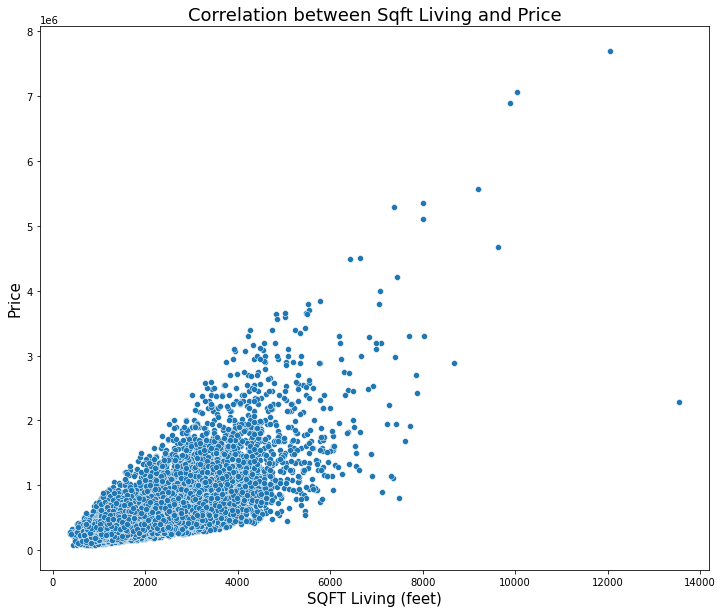

In [59]:
fig, ax = plt.subplots(figsize=(12,10))
sns.scatterplot(x=df['sqft_living'], y=df['price'], ax=ax)
ax.set_title('Correlation between Sqft Living and Price', fontsize=18)
ax.set_ylabel('Price', fontsize=15)
ax.set_xlabel('SQFT Living (feet)', fontsize=15);

In [60]:
# Isolate the features for the first model
model_1_train = X_train[['sqft_living', ]]

model_1_test = X_test[['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'zipcode', 'lat', 'long', 'grade', 'yr_built',  'condition']]

# Initialize a model
model1 = LinearRegression()

# Fit the model
model1.fit(model_1_train, y_train)

# Generate training and test predictions
train_preds2 = model1.predict(model_1_train)
test_preds2 = model1.predict(model_1_test)

# Calculate training and test error
train_error = mean_squared_error(y_train, train_preds2)
test_error = mean_squared_error(y_test, test_preds2)

# What is the difference in training and test error?
difference = test_error - train_error

# Print results
print('Train error:', train_error)
print('Test error:', test_error)
print('Difference:', difference)
print('Training RMSE: {}'.format(np.sqrt(mse(y_train, train_preds2))))
print('Testing RMSE: {}'.format(np.sqrt(mse(y_test, test_preds2))))
print('R^2 value:', model1.score(model_1_test, y_test))

KeyError: "['zipcode'] not in index"

In [61]:
import numpy as np

features = ['sqft_living', 'sqft_lot', 'sqft_living15', 'sqft_lot15', 'sqft_above', 'bathrooms', 'bedrooms', 'long', 'grade', 'yr_built', 'condition']
target = "price"

X = df[features]
y = df[target]

In [62]:
print(X.shape)
print(y.shape)

(21597, 11)
(21597,)


In [63]:
df_6 = df.copy()

In [64]:
from sklearn import linear_model

ols = linear_model.LinearRegression()
model = ols.fit(X, y)

In [65]:
model.coef_

array([ 1.77132137e+02,  5.40671290e-02,  4.28771086e+01, -4.38835895e-01,
       -5.65002428e-01,  5.61122214e+04, -4.91496066e+04, -1.89756512e+05,
        1.22046899e+05, -3.53735868e+03,  1.97563113e+04])

In [66]:
model.intercept_


-17081271.713014156

In [67]:
feature_weight = pd.DataFrame(features, columns=['feature'])
feature_weight['coef'] = model.coef_
importance = feature_weight.sort_values('coef', ascending=False)
importance

,feature,coef
8,grade,122046.899447
5,bathrooms,56112.221374
10,condition,19756.311298
0,sqft_living,177.132137
2,sqft_living15,42.877109
1,sqft_lot,0.054067
3,sqft_lot15,-0.438836
4,sqft_above,-0.565002
9,yr_built,-3537.358681
6,bedrooms,-49149.606636


<AxesSubplot:xlabel='feature', ylabel='coef'>

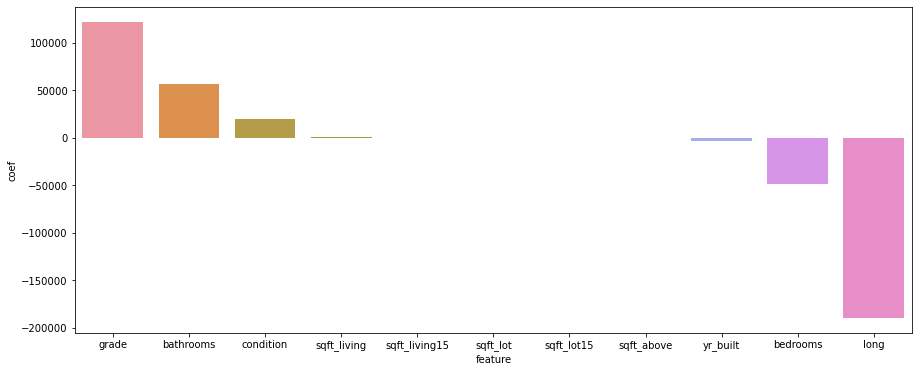

In [68]:
plt.figure(figsize=(15,6))
sns.barplot(x=importance["feature"], y=importance['coef'])

In [69]:
x_pred = np.array([15])
x_pred = x_pred  # preprocessing required by scikit-learn functions

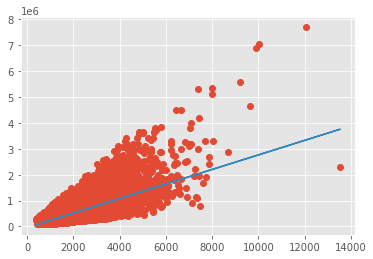

In [70]:
import statsmodels.formula.api as smf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('ggplot')


X = df['sqft_living']
y = df['price']

plt.plot(X, y, 'o')
m, b = np.polyfit(X, y, 1)

plt.plot(X, m*X + b);

In [74]:
df['sqft_living'].mean()

2080.3218502569803

In [75]:
df['grade'].mean()

7.657915451220076

In [76]:
df['bathrooms'].mean()

2.1158262721674306

In [77]:
df['condition'].mean()

3.4098254387183404

In [78]:
df['sqft_living15'].mean()

1986.6203176367087

In [79]:
df['sqft_lot'].mean()

15099.408760475992

In [80]:
df['sqft_lot15'].mean()

12758.283511598833

In [81]:
df['sqft_above'].mean()

1788.5968421540028

In [82]:
df['yr_built'].mean()

1970.9996758809093

In [83]:
df['bedrooms'].mean()

3.3731999814789093

In [84]:
df['price'].mean()

540296.5735055795

In [85]:
zipcode_groupings = df.groupby('zipcode').median()['price'].sort_values(ascending=False)[:10]
zipcode_groupings

zipcode
98039    1895000.0
98004    1150000.0
98040     993750.0
98112     915000.0
98005     765475.0
98006     760184.5
98119     744975.0
98075     739999.0
98109     736000.0
98102     710000.0
Name: price, dtype: float64

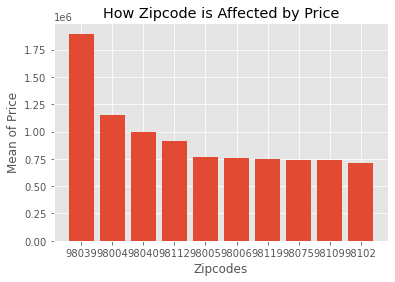

In [86]:
import matplotlib.pyplot as plt
   


plt.bar(zipcode_groupings.index.astype(str), zipcode_groupings.values)
plt.title('How Zipcode is Affected by Price')
plt.xlabel('Zipcodes')
plt.ylabel('Mean of Price')
plt.show()